<a href="https://colab.research.google.com/github/NelsonXunic/compsci_guides/blob/master/Copy_of_L01_Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [L01: Implementing Greedy TSP](https://docs.google.com/document/d/1JA_CWBXPN6whvJAemnJLvtYJ3Pbk84dTUolWO_QqosA/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

## Nelson Xunic Cua

**SUMMARY**: A brief summary description of the design and implementation, including how much your initial design plan evolved, the final result you achieved and the amount of time you spent as a programmer or programmers in accomplishing these results. This should be no more than two paragraphs.

There wasn't much of design to think about since most of the structure was already written. However, there was a previous understanding of what the program was supposed to do, and based on that, the rest of the structure was implemented. In total, it took around 5 hours to complete

**PERSONNEL**: A description of who you worked with and on what sections.  It is expected that all collaboration is done as pair programming together. Also, note these collaborations in the code section itself.

This work was completed by Nelson Xunic.

**CHALLENGES**: Descriptions of the largest challenges you overcame and what made them challenging.

The biggest challenge was completing getRoute(). Thinking about how this method was going to use the rest of methods was difficult and then trying to make it more efficient was more complicated, but it worked.

**INNOVATIONS**: Any innovations that were not specifically required by the assignment. These are not required, but should be highlighted if included.

Does not apply.

**TESTING**: Describe how you tested this work.

Sending things to print was the way I tested whether the implemetation was working or not.

**ERRORS**: A list in bulleted form of all known errors and deficiencies.

- It seems like the implemetantion is adding an extra edge that goes from each node to themselves. I am currently working on fixing this issue. [UPDATE: The issue has been resolved]
- The route does not return to the initial node. [UPDATE: The issue has been resolved]

**COMMENTS**: A paragraph or so of your own comments on and reactions to the Lab. 

Great practice. Helped me remember good coding practices and it gives a good idea on how to implement graphs.

## Import Libraries

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from urllib.request import urlopen

### Read data

In [7]:
tspdata = urlopen("http://cs.berea.edu/courses/csc445/data/tsp-small.txt").read().decode('ASCII')
print(tspdata)

6
1 5 
3 7 
5 11 
3 5 
5 7 
7 9 



## TSP Class

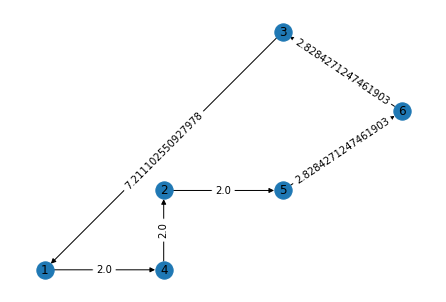

In [12]:
from re import I
import networkx as nx
"""

Given certain input, it uses the greedy algorithm to plot a graph and output a file of the solution path
"""

class TSP:

    def __init__(self):
        """ TSP class containing data needed for networkx graph creation, file reading and file writing. 
            Creates a graph for the traveling salesperon problem using the greedy algorithm
        """

        self.dimension = None
        self.nodeData = []
        self.graph = nx.DiGraph()
        self.coords = {}
        self.places = []
        self.route = [] 

    def extractData(self, inputFile=""):
        """
        Itterate through the input file and append each coordinate into the node list.
        Keyword Arguments:
            inputFile {str} -- a string for the file name (default: {""})
        """
        WTSPC = ['\n', '\r', '\t', ' ']
        inputData = inputFile.split()
        cleanData = [int(i) for i in inputData if i not in WTSPC]

        self.dimension = cleanData[0]

        j = 1
        for i in range(1, len(cleanData), 2):
            nodeX = cleanData[i]
            nodeY = cleanData[i + 1]
            self.nodeData.append([j, nodeX, nodeY])
            j+=1

    def setUpCoords(self):
        """ Puts the coordinates for each node into a dictionary as a tuple with the node as the key """
        for coordinate in self.nodeData:
          self.coords[coordinate[0]]= (coordinate[1],coordinate[2])

    def calculateDistance(self, a, b): 
        """calculates & returns the distance between points a and b
        Arguments:
            a {[tuple]} -- tuple of numbers for the x and y coordinate of a node
            b {[tuple]} -- tuple of numbers for the x and y coordinate of a node
        Returns:
            [float] -- the distance between the two points using the distance formula
        """
        return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

    def getRoute(self, current, visits=[], nVisits=[], needList=True): 
        """Makes a list of the nodes to be visited, in order, according to the greedy alogorithm for the TSP
        Arguments:
            current {int} -- the node to start at, not a list index
        Keyword Arguments:
            visits {list} -- list of places already visited (default: {[]})
            nVisits {list} -- list of places not visited (default: {[]})
            needList {bool} -- boolean deciding if the list of places not visited needs to be filled (default: {True})
        """
        # while there are still nodes to visit
        while nVisits:
          # move the node to visited
          nVisits.remove(current)
          visits.append(current)

          shortestDist = 0
          closestNode = None

          # iterate through nodes that haven't been visited yet
          for possibleNext in nVisits:
            if possibleNext != current:
              # determine distance
              currentDist = self.calculateDistance(self.coords[current], self.coords[possibleNext])

            if currentDist != 0:
              if shortestDist == 0 or currentDist < shortestDist:
                shortestDist = currentDist
                closestNode = possibleNext

          # recursively get the next node in the route
          self.getRoute(closestNode, visits, nVisits) 

    def beGreedy(self, start): 
        """ puts together the greedy algorithm. Gets the route order and adds the starting place to the end of the route
        Arguments:
            start -- the starting node for the greedy algorithm
        """
        places = self.listPlaces()
        places.append(start)
        self.getRoute(start, self.route, places)
    
    def listPlaces(self): 
        """makes a list of all the nodes/places from the dictionary
        Returns:
            [list] -- list of all the nodes/places
        """
        for place in self.coords.keys():
          self.places.append(place)

        return self.places

    def cleanUpList(self, visited, notVisited): 
        """removes items in visited from notVisited
        Arguments:
            visited {list}
            notVisited {list}
        Returns:
            [list] -- a list of notVisited - visited
        """

        for item in visited:
            if item in notVisited:
                notVisited.remove(item)
        return notVisited

    def addNodes(self): 
        """ adds nodes to the networkx graph
        """

        for everything in self.nodeData:
            node = everything[0]
            self.graph.add_node(node, pos=self.coords[node])

    def addEdges(self): 
        """Adds graphs to the networkx graph
        """

        x = 0
        while x < len(self.route)-1:
            self.graph.add_edge(self.route[x], self.route[x+1],
                                weight=self.calculateDistance(self.coords[self.route[x]], self.coords[self.route[x+1]]))
            x += 1

    def showGraph(self):
        """Uses the imported libraries to display the graph
        """
        # get labels and coordinates for the graph
        coords = nx.get_node_attributes(self.graph, 'pos')
        labels = nx.get_edge_attributes(self.graph, 'weight')
        # draw nodes in their coordinates
        nx.draw(self.graph, coords)
        nx.draw_networkx_labels(self.graph, coords)
        # draw edges with their weights
        nx.draw_networkx_edge_labels(self.graph, coords, edge_labels=labels)
        plt.show()




def main():
    tsp = TSP()

    tsp.extractData(tspdata)
    tsp.setUpCoords()
    tsp.addNodes()
    tsp.beGreedy(1)
    tsp.addEdges()
    tsp.showGraph()


main()